In [1]:
# In the last set of activities you learned about basic Python data manipulation and a common astronomy data format: FITS files. You used this to calculate the mean stack of a set of astronomy images.
# Now we're going to look at a different statistical measure — the median, which in many cases is considered to be a better measure than the mean due to its robustness to outliers.
# However, a naïve implementation of the median algorithm can be very inefficient when dealing with large datasets. Luckily, computer scientists have spent a lot of time thinking about this problem and have found some good solutions.
# In the following activities, you will learn different strategies to calculate the median and we will introduce you to thinking about how much CPU time and memory different algorithms require.



  



In [4]:
# The median can be a more robust measure of the average trend of datasets than the mean, as the latter is easily skewed by outliers.
# Say you have some measured fluxes and you calculate their mean:

from statistics import mean
fluxes = [17.3, 70.1, 22.3, 16.2, 20.7]
m = mean(fluxes)
print(m)

# Looking at the original data, most of the numbers are pretty close to 20, so the mean doesn't look very representative. In fact, if you try taking out the outlier, 70.1, out the mean is 19.125.
# The median is defined simply as the middle of the sorted data set. Since only the order of the data points matters, not their value, outliers have much less of an effect.

from statistics import median
fluxes = [17.3, 70.1, 22.3, 16.2, 20.7]
m = median(fluxes)
print(m)

# This is much closer to our intuitive feel for the centre of the set.



29.32
20.7


In [5]:
# To calculate the median of a list without using the statistics module, you need to sort the data and take the central value:

fluxes = [17.3, 70.1, 22.3, 16.2, 20.7]
fluxes.sort()
mid = len(fluxes)//2
median = fluxes[mid]
print(median)

# This only works if you have an odd number of elements. If there are an even number of elements there are two middle ones, so you have to find both and take their average:

fluxes = [17.3, 70.1, 22.3, 16.2, 20.7, 19.3]
fluxes.sort()
mid = len(fluxes)//2
median = (fluxes[mid - 1] + fluxes[mid])/2
print(median)

20.7


In [1]:
# Write a function called list_stats that takes a list of numbers and returns a tuple of the median and mean of the list (in this order).
# The function should work on lists with even or odd numbers of elements and handle the case of a one-element list.
# Your solution cannot use the builtin statistics module.
# Here's an example of how your function should work:

# >>> list_stats([1.3, 2.4, 20.6, 0.95, 3.1])
# (2.4, 5.67)

# Where 2.4 is the median and 5.67 is the mean.
# Your function should work on lists with even and odd numbers of elements. Here's an example using an even-length list:

# >>> list_stats([1.3, 2.4, 20.6, 0.95, 3.1, 2.7])
# (2.55, 5.175)

# For a one element list, the median and mean should be the same:

# >>> list_stats([1.5])
# (1.5, 1.5)

# Hint
# We will not test your function with an empty list.


# Write your list_stats function here.
import numpy as np

def list_stats(values):
    
    n = len(values)
    if n == 0:
       return

    # Mean
    m = sum(values)/n

    # Median
    values.sort()
    mid = int(n/2)
    if n%2 == 0:
        me = (values[mid] + values[mid - 1])/2
    else:
        me = values[mid]

    return me, m



# You can use this to test your function.
# Any code inside this `if` statement will be ignored by the automarker.
if __name__ == '__main__':
  # Run your function with the first example in the question.
  m = list_stats([1.3, 2.4, 20.6, 0.95, 3.1, 2.7])
  print(m)

  # Run your function with the second example in the question
  m = list_stats([1.5])
  print(m)

(2.55, 5.175)
(1.5, 1.5)


In [2]:
# For simple tasks like calculating a mean or a median, it might be tempting to implement the solution yourself, rather than looking for an existing implementation.
# While it is great for your understanding to implement numerical algorithms by hand, your solution may be incorrect (for some edge cases) or inefficient in terms of speed or memory usage.
# We can assume that the community of developers who wrote, for example a popular library like NumPy, have put a lot of effort into checking its correctness and optimising its performance.
# Without discouraging you from trying things yourself, it is important to keep in mind that someone else may have already found a more efficient solution to your problem.
# But how can we judge which implementation is better? One way is by timing your programs. Python offers multiple ways in which this can be accomplished. For example, the time module lets you time any arbitrary piece of code:

import time
start = time.perf_counter()
# potentially slow computation
end = time.perf_counter() - start

# The perf_counter uses the most accurate counter available on your device to measure the elapsed time.

In [4]:
# Let's look at an example. We want to find the mean of a large array using handwritten code and NumPy's mean function.
# Here is the handwritten code. Note: we only time the calculation:

import time, numpy as np
n = 10**7
data = np.random.randn(n)

start = time.perf_counter()
mean = sum(data)/len(data)
seconds = time.perf_counter() - start

print('{:.2f} seconds.'.format(seconds))

0.85 seconds.


In [9]:
# Run the code above and see how long it takes. Now let's compare this to NumPy's mean function:

import time, numpy as np
n = 10**7
data = np.random.randn(n)

start = time.perf_counter()
mean = np.mean(data)
seconds = time.perf_counter() - start
print('{:.2f} seconds.'.format(seconds))

# For the same size arrays, NumPy mean outperforms Python's sum because NumPy is optimised for numerical computation, whereas Python's generic functions work on many data types (e.g. strings).
# Python's sum is more flexible, but much slower.

0.01 seconds.


In [11]:
# #assignment

# # Write a time_stat function to time our statistic implementations.
# time_stat should take three arguments: the func function we're timing, the size of the random array to test, and the number of experiments to perform. It should return the average running time for the func function.
# We have provided a skeleton time_stat function to show you how func should be called. You should add timing code to this function.
# The time for creating new random arrays for each experiment should not be included in the running time.
# For example, to compare Python's and NumPy's version of mean:
    
# >>> time_stat(statistics.mean, 10**5, 10)
# 0.27486825460073305
# >>> time_stat(np.mean, 10**5, 1000)
# 8.059715986019e-05

# The times will differ depending on the hardware and workload of the server. They could be quite different on your own device.
# Time your own implementations from the previous problems. You will find that the NumPy implementations will be hard to beat!


import numpy as np
import statistics
import time

def time_stat(func, size, trials):
  total = 0
  for i in range(trials):
    data = np.random.rand(size)
    start = time.perf_counter()
    res = func(data)
    total += time.perf_counter() - start
  return total/trials

if __name__ == '__main__':
  print('{:.6f}s for statistics.mean'ctime_stat(statistics.mean, 10**6, 10)))
  print('{:.6f}s for np.mean'.format(time_stat(np.mean, 10**6, 10)))

1.531553s for statistics.mean
0.000651s for np.mean


Time taken : 0.050817s
0.017356586332122486


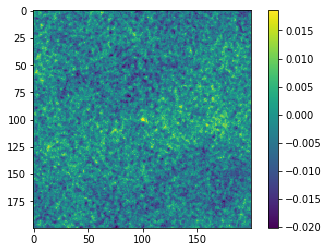

In [39]:
# Timing previous works

# As a simple starting point, we calculate the mean just as we have seen it a couple of times before.
# Then for the median, regardless of whether the list is odd or even length we first have to sort it. You could use NumPy's sort function, which copies the array before sorting it. This is useful if you need to preserve the original ordering for later. Since we don't care about the original ordering here we can use the sort method, which sorts in-place:

# data.sort()

# As with the examples on the previous slide, we'll have to find the index of the middle element in the array using:

# N = len(fluxes)
# mid = int(N/2)

# Casting to an integer using int does two things here. First, it will convert the float from the division into an int, which is necessary since you can only index with an int. Second, the middle index of an odd length list is half the length rounded down, and casting to an int always rounds down.
# Now we have to break up the function depending on whether the array is odd or even length. This is simple enough using the modulus of the length, N%2, and an if statement:

# if N%2 == 0:
#     median = (data[mid] + data[mid - 1])/2
# else:
#     median = data[mid]

# for a set of 4 images

from astropy.io import fits
import numpy as np
import time

# Write your mean_fits function here:
def mean_fits(filenames):
   total = 0
   n=len(filenames)
   start = time.perf_counter()
   if n>0:
      hdulist = fits.open(filenames[0])
      data = hdulist[0].data  
      hdulist.close()
      
      for i in range(1,n):
        hdulist = fits.open(filenames[i])
        data+= hdulist[0].data
        hdulist.close()
        total += time.perf_counter() - start 
      print('Time taken : {:.6f}s'.format(total))
        
      mean = data / n
      return mean
if __name__ == '__main__':
  
  # Test your function with examples from the question
  data  = mean_fits(['Pulsarfits5mean/image0.fits', 'Pulsarfits5mean/image1.fits', 'Pulsarfits5mean/image2.fits'])
  print(data[100, 100])
  

  # You can also plot the result:
  import matplotlib.pyplot as plt
  plt.imshow(data.T, cmap=plt.cm.viridis)
  plt.colorbar()
  plt.show()



Time taken : 3.317915s
0.031536996


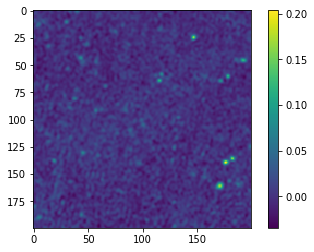

In [40]:

# For a dataset of 1000 images
from astropy.io import fits
import numpy as np
# Write your mean_fits function here:
def mean_fits(filenames):
   total = 0 
   n=len(filenames)
   start = time.perf_counter()

   if n>0:
      hdulist = fits.open(filenames[0])
      data = hdulist[0].data  
      hdulist.close()
      
      for i in range(1,n):
        hdulist = fits.open(filenames[i])
        data+= hdulist[0].data
        hdulist.close()
      
      total = time.perf_counter() - start 
      print('Time taken : {:.6f}s'.format(total))
        
      mean = data / n
      return mean
    
# Driver function
    
if __name__ == '__main__':
  
  # Test your function with examples from the question
  

  t = []
  t.append('Pulsarfits1000/0000.fits')
  for i in range(1,10):
      t.append('Pulsarfits1000/000%d.fits' %i)
  
  for j in range(11,100):
      t.append('Pulsarfits1000/00%d.fits' %j)
  
  for k in range(101,1000):
      t.append('Pulsarfits1000/0%d.fits' %k)
  
  data = mean_fits(t)
  print(data[100, 100])

  # You can also plot the result:
  import matplotlib.pyplot as plt
  plt.imshow(data.T, cmap=plt.cm.viridis)
  plt.colorbar()
  plt.show()

Time taken : 48.062319s
0.024822164


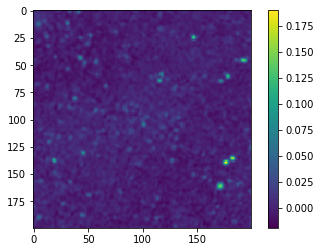

In [41]:

# For a dataset of 7330 images

from astropy.io import fits
import numpy as np
# Write your mean_fits function here:
def mean_fits(filenames):
   total = 0 
   n=len(filenames)
   start = time.perf_counter()

   if n>0:
      hdulist = fits.open(filenames[0])
      data = hdulist[0].data  
      hdulist.close()
      
      for i in range(1,n):
        hdulist = fits.open(filenames[i])
        data+= hdulist[0].data
        hdulist.close()
        
      total = time.perf_counter() - start 
      print('Time taken : {:.6f}s'.format(total))
        
      mean = data / n
      return mean
    
# Driver function
    
if __name__ == '__main__':
  
  # Test your function with examples from the question
  

  t = []
  t.append('Pulsarfits7330/0000.fits')
  for i in range(1,7330):
      if ((i>1) and (i<10)):
          t.append('Pulsarfits7330/000%d.fits' %i)
      elif ((i>11) and (i<100)):
          t.append('Pulsarfits7330/00%d.fits' %i)
      elif ((i>101) and (i<1000)):
          t.append('Pulsarfits7330/0%d.fits' %i)
      elif i>1001:
          t.append('Pulsarfits7330/%d.fits' %i)
        
  data = mean_fits(t)
  print(data[100, 100])

  # You can also plot the result:
  import matplotlib.pyplot as plt
  plt.imshow(data.T, cmap=plt.cm.viridis)
  plt.colorbar()
  plt.show()
    

Time taken : 70.674960s
0.0004026278


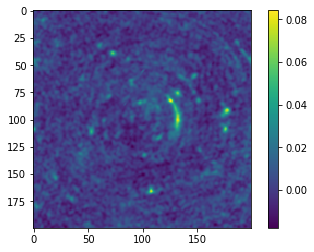

In [42]:
# For a dataset of 9587 images

from astropy.io import fits
import numpy as np
# Write your mean_fits function here:
def mean_fits(filenames):
   total = 0 
   n=len(filenames)
   start = time.perf_counter()
   if n>0:
      hdulist = fits.open(filenames[0])
      data = hdulist[0].data  
      hdulist.close()
      
      for i in range(1,n):
        hdulist = fits.open(filenames[i])
        data+= hdulist[0].data
        hdulist.close()
        
      total = time.perf_counter() - start 
      print('Time taken : {:.6f}s'.format(total))
      
      mean = data / n
      return mean
    
# Driver function
    
if __name__ == '__main__':
  
  # Test your function with examples from the question
  

  t = []
  t.append('Pulsarfitsrandom_position9587/0000.fits')
  for i in range(1,9587):
      if ((i>1) and (i<10)):
          t.append('Pulsarfitsrandom_position9587/000%d.fits' %i)
      elif ((i>11) and (i<100)):
          t.append('Pulsarfitsrandom_position9587/00%d.fits' %i)
      elif ((i>101) and (i<1000)):
          t.append('Pulsarfitsrandom_position9587/0%d.fits' %i)
      elif i>1001:
          t.append('Pulsarfitsrandom_position9587/%d.fits' %i)
        
  data = mean_fits(t)
  print(data[100, 100])

  # You can also plot the result:
  import matplotlib.pyplot as plt
  plt.imshow(data.T, cmap=plt.cm.viridis)
  plt.colorbar()
  plt.show()
    

In [43]:
# Time isnt the only isssue

# When comparing algorithms, we may need to consider their memory usage as well as their speed. To create memory-efficient algorithms we first have to understand how Python uses memory.
# Let's look at how much memory 32-bit Python needs to store some objects. The sys module allows us to check memory usage:

import sys

a = 3
b = 3.123
c = [a, b, a*b]
d = []
for obj in [a, b, c, d]:
    print(obj, sys.getsizeof(obj))

# The memory used by c is not the sum of the sizes of a and b.
# Firstly, there is overhead for the list itself (the empty list d is 32 bytes). Secondly, the list does not contain the objects themselves, but instead holds references to the other objects in memory.
# Try inserting elements into an empty list and see how the memory usage grows as you add elements.

# Note
# The values getsizeof returns depend on the Python implementation, the operating system, and the system architecture (e.g. 32-bit vs 64-bit). So don't be surprised if you get different results outside of Grok.


3 28
3.123 24
[3, 3.123, 9.369] 88
[] 64


In [44]:
# Since NumPy arrays are more compact, let's look at their memory usage. For NumPy arrays, getsizeof returns the total size.
# Since NumPy overheads are small, we can use the array's nbytes attribute to get the memory usage of the data itself:

import sys
import numpy as np

a = np.array([])
b = np.array([1, 2, 3])
c = np.zeros(10**6)

for obj in [a, b, c]:
  print('sys:', sys.getsizeof(obj), 'np:', obj.nbytes) 
print("\n")

# getsizeof will always return a larger value because NumPy arrays contain metadata about the data type, the shape of the array, and other properties, as well as the data itself.
# We can calculate the nbytes value by multiplying the number of elements with the size in bytes of each element. The latter will be constant over the array.

import numpy as np

a = np.zeros(5, dtype=np.int32)
b = np.zeros(5, dtype=np.float64)

for obj in [a, b]:
  print('nbytes         :', obj.nbytes)
  print('size x itemsize:', obj.size*obj.itemsize)
    
# Here we have set the dtype attribute to create two same-shape arrays with different data types. The size of each element in bytes is given by itemsize.

sys: 96 np: 0
sys: 120 np: 24
sys: 8000096 np: 8000000


nbytes         : 20
size x itemsize: 20
nbytes         : 40
size x itemsize: 40


In [45]:
# We now have an easy way to calculate the size of NumPy arrays in memory, so let's have a look at how things scale if we're working with many large arrays.
# In the previous activity, we used FITS images with 200 ⨉ 200 pixels stored in (200, 200) arrays. Each element is a NumPy float32 (the 32 is 32 bits), which requires 4 bytes of memory. Hence the size of the entire array is:
# print(200*200*4)
# In this example, the array would take up 156.25 kB (divide by 1024) of memory. This may not seem a lot, but now let's think about cases in which we have tens or thousands of arrays, if we wanted to calculate the median across them.
# Use the example above to see how much memory is used for 1000 and 10,000 arrays and compare this to the memory of your machine. Typical astronomy images are also larger than 200 ⨉ 200.


# Assignment

# Now that you've learned how to time code and calculate its memory usage, let's apply it to a realistic example.
# Write a median_fits function which takes a list of FITS filenames, loads them into a NumPy array, and calculates the median image (where each pixel is the median of that pixel over every FITS file).
# Your function should return a tuple of the median NumPy array, the time it took the function to run, and the amount of memory (in kB) used to store all the FITS files in the NumPy array in memory.
# The running time should include loading the FITS files and calculating the median.
# In the example below, we only inspect the centre (100, 100) pixel:
    
# result = median_fits(['image0.fits', 'image1.fits'])
# print(result[0][100, 100], result[1], result[2]) 
# 0.0123380571604 0.015657663345336914, 625.0

# This says the centre pixel has median ~0.01234, median_fits took 0.016 seconds, and the data we loaded required 625kB of memory.
# If you call median_fits using all the 12 FITS files, you should get:
    
# result = median_fits(['image{}.fits'.format(str(i)) for i in range(11)])
# print(result[0][100, 100], result[1], result[2]) 
# 0.0118672577664 0.06801033020019531 3437.5

# Note:
# You can get quite different results for your timing, depending on how you implement the median calculation (we've used NumPy's median in the examples), but the central element of the array and the memory footprint you calculate should be the same as in the example.

# To time the function correctly, we start the timer right at the beginning, as we have done before. Then, we have to read in all the FITS files and store them, which we can do for instance using a list. The trickiest part of this problem is to calculate the median over all the files. Here we're using the NumPy function on a 3D-array with the axis argument to perform the calculation across the third dimension.
# The memory taken up by the data can be calculated using the nbytes attribute if all the data is stored in a NumPy array, or otherwise by multiplying the number of files by the file dimension and the size of the data type (here np.float64 with 8 bytes).
# We stop the timer at the end of the function, and return the median array, the time and the memory footprint.

# <-----Start----->

# Write your function median_FITS here:
import time, numpy as np
from astropy.io import fits

def median_fits(files):

  start = time.time()   # Start timer
  # Read in all the FITS files and store in list
  FITS_list = []
  for file in files: 
    hdulist = fits.open(file)
    FITS_list.append(hdulist[0].data)
    hdulist.close()

  # Stack image arrays in 3D array for median calculation
  FITS_stack = np.dstack(FITS_list)

  median = np.median(FITS_stack, axis=2)

  # Calculate the memory consumed by the data
  memory = FITS_stack.nbytes
  # or, equivalently:
  #memory = 200 * 200 * len(filenames) * FITS_stack.itemsize

  # convert to kB:
  memory /= 1024
  
  stop = time.time() - start   # stop timer
  return median, stop, memory



# You can use this to test your function.
# Any code inside this `if` statement will be ignored by the automarker.
if __name__ == '__main__':
  # Run your function with first example in the question.
  result = median_fits(['Pulsarfits5median/image0.fits', 'Pulsarfits5median/image1.fits'])
  print(result[0][100, 100], result[1], result[2])
  
  # Run your function with second example in the question.
  result = median_fits(['Pulsarfits5median/image{}.fits'.format(str(i)) for i in range(11)])
  print(result[0][100, 100], result[1], result[2])



# <-----Stop------>

0.012338057160377502 0.20628046989440918 625.0
0.01186725776642561 0.1095128059387207 3437.5


In [46]:
# Saving Space

# Calculating the median requires all the data to be in memory at once. This is an issue in typical astrophysics calculations, which may use hundreds of thousands of FITS files.
# Through the previous activities, you have hopefully noticed that even with a machine with lots of RAM, it's not going to be possible to find the median of more than a few tens of thousands of images.
# This isn’t an issue for calculating the mean, since the sum only requires one image to be added at a time. You can load an image, add it to the sum, and then reuse the memory. Since the sum is only ever the size of a single image, you’ll never run out of memory.


# Histogram Method

# If there were a way to calculate a "running median" you could save space by only having one image loaded at a time. Unfortunately, there’s no way to do an exact running median, but there are ways to do it approximately.
# The binapprox algorithm does just this. The idea behind it is to find the median from the data's histogram. As an example, say we have a list of 30 numbers between 7 and 16 and its histogram is:

# https://groklearning-cdn.com/modules/dw9AvcWCtyCN4L6JXMLMk4/histogram_labelled.png

# The median is the average of the 15th and 16th numbers in the ordered list (we can think of this as the 15.5th number). So, starting from the left, if we sum up the counts in the histogram bins until we get to just over 15.5 then we know the last bin we added must have contained the median.
# In our example, the first 3 bins sum to 9 and the first 4 bins sum to 18, so we know that the median falls into the 4th bin (marked in red), and so it must be between 10 and 11.
# We choose the middle (or midpoint) giving an estimate of 10.5.    



In [47]:
# The Binapprox Algorithm


# The binapprox algorithm uses the method from the previous slide, but it saves even more time and space by only looking for the median within one standard deviation of the mean (see the link if you’d like to know why that works).
# The full algorithm for a set of  data points works as follows:

# Calculate their mean and standard deviation, miu and delta;
# Set the bounds: minval = miu - delta and maxval = miu + delta. Any value >= maxval is ignored;
# Set the bin width: width = 2*delta/B;
# Make an ignore bin for counting value < minval;
# Make B bins for counting values in minval and maxval, e.g. the first bin is minval <= value < minval + width;
# Count the number of values that fall into each bin;
# Sum these counts until total >= (N + 1)/2. Remember to start from the ignore bin;
# Return the midpoint of the bin that exceeded (N + 1)/2.
 
# The midpoint of a bin is just the average of its min and max boundaries, i.e. the lower boundary + width/2.

# As soon as the relevant bin is updated the data point being binned can be removed from memory. So if you're finding the median of a bunch of FITS files you only need to have one loaded at any time. (The mean and standard deviation can both be calculated from running sums so that still applies to the first step).
# The downside of using binapprox is that you only get an answer accurate to delta/B by using  bins. Scientific data comes with its own uncertainties though, so as long as you keep B large enough this isn't necessarily a problem.


# Implementing the BInapprox Algorithm

# Let's implement the binapprox algorithm to calculate the median of a list of numbers. This algorithm is quite complex, so we'll break it down into managable parts.
# Your task is to write two functions:

# 1. median_bins to calculate the mean, standard deviation and the bins (steps 1-6 on the previous slide);
# 2. median_approx which calls median_bins and then calculates the approximated median (steps 7-8).

# We will test each function separately.

# median_bins(values, B)
# This function takes a list of values and the number of bins, B, and returns the mean miu and standard deviation delta of the values, the number of values smaller than miu - delta, and a NumPy array with B elements containing the bin counts. For example:
# >>> median_bins([1, 1, 3, 2, 2, 6], 3)
# (2.5, 1.707825127659933, 0, array([ 2.,  3.,  0.]))

# median_approx(values, B)
# This function takes the same input as median_bins. It should return the approximate median using median_bins to calculate the bins. Using the same data as above, it should work like this:
# >>> median_approx([1,1,3,2,2,6], 3)
# 2.5
# To make sure your functions work for the general case, here's another example which uses four bins:
# >>> median_bins([1, 5, 7, 7, 3, 6, 1, 1], 4)
# (3.875, 2.521780125229002, 3, array([ 0.,  1.,  1.,  1.]))
# >>> median_approx([1, 5, 7, 7, 3, 6, 1, 1], 4)
# 4.50544503130725
# Here's an example in which binapprox is a bad approximation:
# >>> median_bins([0, 1], 5)
# (0.5, 0.5, 0, array([ 1.,  0.,  0.,  0., 0.]))
# >>> median_approx([0, 1], 5)
# 0.90000000000000002

# Assignment Question: 

# Write your median_bins and median_approx functions here.

# We begin with the median_bins function. First we have to calculate the mean and standard deviation. We're not concerned about memory management for this solution since we're working with small lists, so we can just let NumPy handle the calculation of these.
# mean = np.mean(values)
# std = np.std(values)
# Next we set up an array to hold the counts for all the bins, including the bin that holds all the elements less than  (called left_bin here) and the bins between  and  (stored in the array bins):


# left_bin = 0
# bins = np.zeros(B)
# Next we go through all the elements in the input list, values, and decide which bin they belong to. If the value is greater than we ignore it, since it doesn't help us find the median.


# for value in values:
#   if value < mean - std:
#     left_bin += 1
#   elif value < mean + std:
#     bin = int((value - (mean - std))/bin_width)
#     bins[bin] += 1
# There are a few ways to find which bin the current value belongs to. For instance, you could create another for loop inside this one and iterate through all the bin positions until you find the one that encompasses the current value. Since we're working with equally space bins though, the simplest way is to take the number of bin widths the current value is from , given by (value - (mean - std))/bin_width and then floor it (int not only floors the value but lets us use it as an array index).

# At the end of the function, we return all these objects so that they're available for the median_approx function.

# This function is counting up from the leftmost bin (which holds all the values less than ) until we get to the bin that holds the middle element.


#     count = left_bin
#     for b, bincount in enumerate(bins):
#         count += bincount
#         if count >= mid:
#             # Stop when the cumulative count exceeds the midpoint
#             break
# This for-loop stops when b is the index of the median bin. Then we return the midpoint of bin b:


# median = mean - std + bin_width*(b + 0.5)


import numpy as np

def median_bins(values, B):
  mean = np.mean(values)
  std = np.std(values)
    
  # Initialise bins
  left_bin = 0
  bins = np.zeros(B)
  bin_width = 2*std/B
    
  # Bin values
  for value in values:
    if value < mean - std:
      left_bin += 1
    elif value < mean + std:
      bin = int((value - (mean - std))/bin_width)
      bins[bin] += 1
    # Ignore values above mean + std

  return mean, std, left_bin, bins


def median_approx(values, B):
  # Call median_bins to calculate the mean, std,
  # and bins for the input values
  mean, std, left_bin, bins = median_bins(values, B)
    	
  # Position of the middle element
  N = len(values)
  mid = (N + 1)/2

  count = left_bin
  for b, bincount in enumerate(bins):
    count += bincount
    if count >= mid:
      # Stop when the cumulative count exceeds the midpoint
      break

  width = 2*std/B
  median = mean - std + width*(b + 0.5)
  return median



# You can use this to test your functions.
# Any code inside this `if` statement will be ignored by the automarker.
if __name__ == '__main__':
  # Run your functions with the first example in the question.
  print(median_bins([1, 1, 3, 2, 2, 6], 3))
  print(median_approx([1, 1, 3, 2, 2, 6], 3))

  # Run your functions with the second example in the question.
  print(median_bins([1, 5, 7, 7, 3, 6, 1, 1], 4))
  print(median_approx([1, 5, 7, 7, 3, 6, 1, 1], 4))


(2.5, 1.707825127659933, 0, array([2., 3., 0.]))
2.5
(3.875, 2.521780125229002, 3, array([0., 1., 1., 1.]))
4.50544503130725


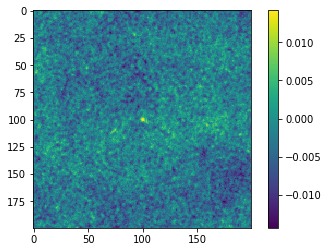

In [54]:
# This problem is essentially a combination of the previous problem on FITS files and the binapprox problem. To solve it, we use the solution to the binapprox question and make it work on a list of 2D arrays instead of just a single list and we use the Astropy module to read in the FITS files.
# Since we want to calculate the median across the stack of FITS files, we treat every array element individually. To start off, we use running_stats to calculate the mean and standard deviation across all the files - these are now arrays of shape (200, 200). The objects in which we stored the bin counts in the last problem we now implement as arrays too, where the bins array has one extra dimension, such that its shape becomes (200, 200, B), where B is the number of bins.
# Then, to fill the bins array, we read in one FITS file at a time and loop through all array elements to check in which bin they belong.
# Finally, we import the results from median_bins_FITS into the median_approx_FITS function and loop through the elements of the bin count arrays to calculate the median. Compare this solution in detail to the solution to the previous problem.

## HELPER FUNCTION (helper.py)

import time, numpy as np
from astropy.io import fits

def running_stats(filenames):
  '''Calculates the running mean and stdev for a list of FITS files using Welford's method.'''
  n = 0
  for filename in filenames:
    hdulist = fits.open(filename)
    data = hdulist[0].data
    if n == 0:
      mean = np.zeros_like(data)
      s = np.zeros_like(data)

    n += 1
    delta = data - mean
    mean += delta/n
    s += delta*(data - mean)
    hdulist.close()

  s /= n - 1
  np.sqrt(s, s)

  if n < 2:
    return mean, None
  else:
    return mean, s


# Main Function and driver Fucntion Over here

def median_bins_fits(filenames, B):
  # Calculate the mean and standard dev
  mean, std = running_stats(filenames)
    
  dim = mean.shape # Dimension of the FITS file arrays
    
  # Initialise bins
  left_bin = np.zeros(dim)
  bins = np.zeros((dim[0], dim[1], B))
  bin_width = 2 * std / B 

  # Loop over all FITS files
  for filename in filenames:
      hdulist = fits.open(filename)
      data = hdulist[0].data

      # Loop over every point in the 2D array
      for i in range(dim[0]):
        for j in range(dim[1]):
          value = data[i, j]
          mean_pt = mean[i, j]
          std_pt= std[i, j]

          if value < mean_pt - std_pt:
            left_bin[i, j] += 1
                
          elif value >= mean_pt - std_pt and value < mean_pt + std_pt:
            bin = int((value - (mean_pt - std_pt))/bin_width[i, j])
            bins[i, j, bin] += 1

  return mean, std, left_bin, bins


def median_approx_fits(filenames, B):
  mean, std, left_bin, bins = median_bins_fits(filenames, B)
    
  dim = mean.shape # Dimension of the FITS file arrays
    
  # Position of the middle element over all files
  N = len(filenames)
  mid = (N + 1)/2
	
  bin_width = 2*std / B
  # Calculate the approximated median for each array element
  median = np.zeros(dim)   
  for i in range(dim[0]):
    for j in range(dim[1]):    
      count = left_bin[i, j]
      for b, bincount in enumerate(bins[i, j]):
        count += bincount
        if count >= mid:
          # Stop when the cumulative count exceeds the midpoint
          break
      median[i, j] = mean[i, j] - std[i, j] + bin_width[i, j]*(b + 0.5)
      
  return median
    


# You can use this to test your function.
# Any code inside this `if` statement will be ignored by the automarker.
if __name__ == '__main__':
  # Run your function with examples from the question.
  mean, std, left_bin, bins = median_bins_fits(['Pulsarfits5median/image0.fits', 'Pulsarfits5median/image1.fits', 'Pulsarfits5median/image2.fits'], 5)
  median = median_approx_fits(['Pulsarfits5median/image0.fits', 'Pulsarfits5median/image1.fits', 'Pulsarfits5median/image2.fits'], 5)
#   print (median)
  import matplotlib.pyplot as plt
  plt.imshow(median.T, cmap=plt.cm.viridis)
  plt.colorbar()
  plt.show()

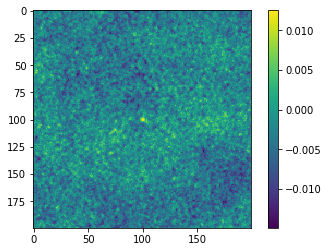

In [56]:
# This problem is essentially a combination of the previous problem on FITS files and the binapprox problem. To solve it, we use the solution to the binapprox question and make it work on a list of 2D arrays instead of just a single list and we use the Astropy module to read in the FITS files.
# Since we want to calculate the median across the stack of FITS files, we treat every array element individually. To start off, we use running_stats to calculate the mean and standard deviation across all the files - these are now arrays of shape (200, 200). The objects in which we stored the bin counts in the last problem we now implement as arrays too, where the bins array has one extra dimension, such that its shape becomes (200, 200, B), where B is the number of bins.
# Then, to fill the bins array, we read in one FITS file at a time and loop through all array elements to check in which bin they belong.
# Finally, we import the results from median_bins_FITS into the median_approx_FITS function and loop through the elements of the bin count arrays to calculate the median. Compare this solution in detail to the solution to the previous problem.

## HELPER FUNCTION (helper.py)

import time, numpy as np
from astropy.io import fits

def running_stats(filenames):
  '''Calculates the running mean and stdev for a list of FITS files using Welford's method.'''
  n = 0
  for filename in filenames:
    hdulist = fits.open(filename)
    data = hdulist[0].data
    if n == 0:
      mean = np.zeros_like(data)
      s = np.zeros_like(data)

    n += 1
    delta = data - mean
    mean += delta/n
    s += delta*(data - mean)
    hdulist.close()

  s /= n - 1
  np.sqrt(s, s)

  if n < 2:
    return mean, None
  else:
    return mean, s


# Main Function and driver Fucntion Over here

def median_bins_fits(filenames, B):
  # Calculate the mean and standard dev
  mean, std = running_stats(filenames)
    
  dim = mean.shape # Dimension of the FITS file arrays
    
  # Initialise bins
  left_bin = np.zeros(dim)
  bins = np.zeros((dim[0], dim[1], B))
  bin_width = 2 * std / B 

  # Loop over all FITS files
  for filename in filenames:
      hdulist = fits.open(filename)
      data = hdulist[0].data

      # Loop over every point in the 2D array
      for i in range(dim[0]):
        for j in range(dim[1]):
          value = data[i, j]
          mean_pt = mean[i, j]
          std_pt= std[i, j]

          if value < mean_pt - std_pt:
            left_bin[i, j] += 1
                
          elif value >= mean_pt - std_pt and value < mean_pt + std_pt:
            bin = int((value - (mean_pt - std_pt))/bin_width[i, j])
            bins[i, j, bin] += 1

  return mean, std, left_bin, bins


def median_approx_fits(filenames, B):
  mean, std, left_bin, bins = median_bins_fits(filenames, B)
    
  dim = mean.shape # Dimension of the FITS file arrays
    
  # Position of the middle element over all files
  N = len(filenames)
  mid = (N + 1)/2
	
  bin_width = 2*std / B
  # Calculate the approximated median for each array element
  median = np.zeros(dim)   
  for i in range(dim[0]):
    for j in range(dim[1]):    
      count = left_bin[i, j]
      for b, bincount in enumerate(bins[i, j]):
        count += bincount
        if count >= mid:
          # Stop when the cumulative count exceeds the midpoint
          break
      median[i, j] = mean[i, j] - std[i, j] + bin_width[i, j]*(b + 0.5)
      
  return median
    


# You can use this to test your function.
# Any code inside this `if` statement will be ignored by the automarker.
if __name__ == '__main__':
  # Run your function with examples from the question.
  mean, std, left_bin, bins = median_bins_fits(['Pulsarfits5median/image{}.fits'.format(str(i)) for i in range(11)], 5)
  median = median_approx_fits(['Pulsarfits5median/image{}.fits'.format(str(i)) for i in range(11)], 5)
# print (median)
  import matplotlib.pyplot as plt
  plt.imshow(median.T, cmap=plt.cm.viridis)
  plt.colorbar()
  plt.show()

0.767706s


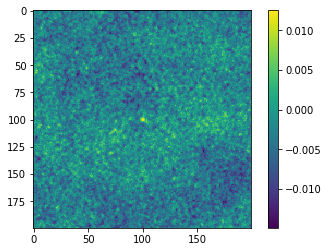

In [81]:
# This problem is essentially a combination of the previous problem on FITS files and the binapprox problem. To solve it, we use the solution to the binapprox question and make it work on a list of 2D arrays instead of just a single list and we use the Astropy module to read in the FITS files.
# Since we want to calculate the median across the stack of FITS files, we treat every array element individually. To start off, we use running_stats to calculate the mean and standard deviation across all the files - these are now arrays of shape (200, 200). The objects in which we stored the bin counts in the last problem we now implement as arrays too, where the bins array has one extra dimension, such that its shape becomes (200, 200, B), where B is the number of bins.
# Then, to fill the bins array, we read in one FITS file at a time and loop through all array elements to check in which bin they belong.
# Finally, we import the results from median_bins_FITS into the median_approx_FITS function and loop through the elements of the bin count arrays to calculate the median. Compare this solution in detail to the solution to the previous problem.

## HELPER FUNCTION (helper.py)

import numpy as np
from astropy.io import fits
import time


def running_stats(filenames):
  '''Calculates the running mean and stdev for a list of FITS files using Welford's method.'''
  n = 0
  for filename in filenames:
    hdulist = fits.open(filename)
    data = hdulist[0].data
    if n == 0:
      mean = np.zeros_like(data)
      s = np.zeros_like(data)

    n += 1
    delta = data - mean
    mean += delta/n
    s += delta*(data - mean)
    hdulist.close()

  s /= n - 1
  np.sqrt(s, s)

  if n < 2:
    return mean, None
  else:
    return mean, s



# Main Function and driver Fucntion Over here

def median_bins_fits(filenames, B):
  
  # Calculate the mean and standard dev
  mean, std = running_stats(filenames)
    
  dim = mean.shape # Dimension of the FITS file arrays
    
  # Initialise bins
  left_bin = np.zeros(dim)
  bins = np.zeros((dim[0], dim[1], B))
  bin_width = 2 * std / B 
  

  # Timer Start
  start = time.perf_counter()

  # Loop over all FITS files
  for filename in filenames:
      hdulist = fits.open(filename)
      data = hdulist[0].data

      # Loop over every point in the 2D array
      for i in range(dim[0]):
        for j in range(dim[1]):
          value = data[i, j]
          mean_pt = mean[i, j]
          std_pt= std[i, j]

          if value < mean_pt - std_pt:
            left_bin[i, j] += 1
                
          elif value >= mean_pt - std_pt and value < mean_pt + std_pt:
            bin = int((value - (mean_pt - std_pt))/bin_width[i, j])
            bins[i, j, bin] += 1
        
        
  t = time.perf_counter() - start
  
  
  return mean, std, left_bin, bins, t



def median_approx_fits(filenames, B):
  
  mean, std, left_bin, bins, timer = median_bins_fits(filenames, B)
    
  dim = mean.shape # Dimension of the FITS file arrays
  
  start = time.perf_counter()  
 
  # Position of the middle element over all files
  N = len(filenames)
  mid = (N + 1)/2
	
    
  bin_width = 2*std / B
  # Calculate the approximated median for each array element
  median = np.zeros(dim)   
  for i in range(dim[0]):
    for j in range(dim[1]):    
      count = left_bin[i, j]
      for b, bincount in enumerate(bins[i, j]):
        count += bincount
        if count >= mid:
          # Stop when the cumulative count exceeds the midpoint
          break
      median[i, j] = mean[i, j] - std[i, j] + bin_width[i, j]*(b + 0.5)
 

  #Final timer
  ti = time.perf_counter() - start
  timer += ti
  
  print('{:.6f}s'.format(timer))
    
  return median
    


# You can use this to test your function.
# Any code inside this `if` statement will be ignored by the automarker.
if __name__ == '__main__':
  
  # Run your function with examples from the question.
  # mean, std, left_bin, bins, time = median_bins_fits(['Pulsarfits5median/image{}.fits'.format(str(i)) for i in range(11)], 5)
  median = median_approx_fits(['Pulsarfits5median/image{}.fits'.format(str(k)) for k in range(11)], 5)
  
    
  # print (median)
    
  import matplotlib.pyplot as plt
  plt.imshow(median.T, cmap=plt.cm.viridis)
  plt.colorbar()
  plt.show()

In [91]:
print(["{:0>4s}".format(str(k)) for k in range(7330)])

['0000', '0001', '0002', '0003', '0004', '0005', '0006', '0007', '0008', '0009', '0010', '0011', '0012', '0013', '0014', '0015', '0016', '0017', '0018', '0019', '0020', '0021', '0022', '0023', '0024', '0025', '0026', '0027', '0028', '0029', '0030', '0031', '0032', '0033', '0034', '0035', '0036', '0037', '0038', '0039', '0040', '0041', '0042', '0043', '0044', '0045', '0046', '0047', '0048', '0049', '0050', '0051', '0052', '0053', '0054', '0055', '0056', '0057', '0058', '0059', '0060', '0061', '0062', '0063', '0064', '0065', '0066', '0067', '0068', '0069', '0070', '0071', '0072', '0073', '0074', '0075', '0076', '0077', '0078', '0079', '0080', '0081', '0082', '0083', '0084', '0085', '0086', '0087', '0088', '0089', '0090', '0091', '0092', '0093', '0094', '0095', '0096', '0097', '0098', '0099', '0100', '0101', '0102', '0103', '0104', '0105', '0106', '0107', '0108', '0109', '0110', '0111', '0112', '0113', '0114', '0115', '0116', '0117', '0118', '0119', '0120', '0121', '0122', '0123', '0124',

Timee taken 79.237537 sec


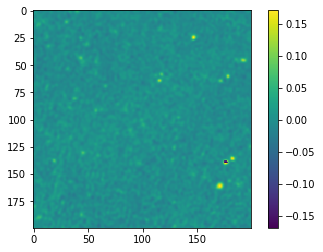

In [104]:
# This problem is essentially a combination of the previous problem on FITS files and the binapprox problem. To solve it, we use the solution to the binapprox question and make it work on a list of 2D arrays instead of just a single list and we use the Astropy module to read in the FITS files.
# Since we want to calculate the median across the stack of FITS files, we treat every array element individually. To start off, we use running_stats to calculate the mean and standard deviation across all the files - these are now arrays of shape (200, 200). The objects in which we stored the bin counts in the last problem we now implement as arrays too, where the bins array has one extra dimension, such that its shape becomes (200, 200, B), where B is the number of bins.
# Then, to fill the bins array, we read in one FITS file at a time and loop through all array elements to check in which bin they belong.
# Finally, we import the results from median_bins_FITS into the median_approx_FITS function and loop through the elements of the bin count arrays to calculate the median. Compare this solution in detail to the solution to the previous problem.

## HELPER FUNCTION (helper.py)

import numpy as np
from astropy.io import fits
import time


def running_stats(filenames):
  '''Calculates the running mean and stdev for a list of FITS files using Welford's method.'''
  n = 0
  for filename in filenames:
    hdulist = fits.open(filename)
    data = hdulist[0].data
    if n == 0:
      mean = np.zeros_like(data)
      s = np.zeros_like(data)

    n += 1
    delta = data - mean
    mean += delta/n
    s += delta*(data - mean)
    hdulist.close()

  s /= n - 1
  np.sqrt(s, s)

  if n < 2:
    return mean, None
  else:
    return mean, s



# Main Function and driver Fucntion Over here

def median_bins_fits(filenames, B):
  
  # Calculate the mean and standard dev
  mean, std = running_stats(filenames)
    
  dim = mean.shape # Dimension of the FITS file arrays
    
  # Initialise bins
  left_bin = np.zeros(dim)
  bins = np.zeros((dim[0], dim[1], B))
  bin_width = 2 * std / B 
  

  # Timer Start
  start = time.perf_counter()

  # Loop over all FITS files
  for filename in filenames:
      hdulist = fits.open(filename)
      data = hdulist[0].data

      # Loop over every point in the 2D array
      for i in range(dim[0]):
        for j in range(dim[1]):
          value = data[i, j]
          mean_pt = mean[i, j]
          std_pt= std[i, j]

          if value < mean_pt - std_pt:
            left_bin[i, j] += 1
                
          elif value >= mean_pt - std_pt and value < mean_pt + std_pt:
            bin = int((value - (mean_pt - std_pt))/bin_width[i, j])
            bins[i, j, bin] += 1
        
        
  t = time.perf_counter() - start
  
  
  return mean, std, left_bin, bins, t



def median_approx_fits(filenames, B):
  
  mean, std, left_bin, bins, timer = median_bins_fits(filenames, B)
    
  dim = mean.shape # Dimension of the FITS file arrays
  
  start = time.perf_counter()  
 
  # Position of the middle element over all files
  N = len(filenames)
  mid = (N + 1)/2
	
    
  bin_width = 2*std / B
  # Calculate the approximated median for each array element
  median = np.zeros(dim)   
  for i in range(dim[0]):
    for j in range(dim[1]):    
      count = left_bin[i, j]
      for b, bincount in enumerate(bins[i, j]):
        count += bincount
        if count >= mid:
          # Stop when the cumulative count exceeds the midpoint
          break
      median[i, j] = mean[i, j] - std[i, j] + bin_width[i, j]*(b + 0.5)
 

  #Final timer
  ti = time.perf_counter() - start
  timer += ti
  
  print('Timee taken {:.6f} sec'.format(timer))
    
  return median
    


# You can use this to test your function.
# Any code inside this `if` statement will be ignored by the automarker.
if __name__ == '__main__':
  
  # Run your function with examples from the question.
  # mean, std, left_bin, bins, time = median_bins_fits(['Pulsarfits5median/image{}.fits'.format(str(i)) for i in range(11)], 5)
  median = median_approx_fits(['Pulsarfits1000/{:0>4s}.fits'.format(str(k)) for k in range(1000)], 5)
  
    
  # print (median)
    
  import matplotlib.pyplot as plt
  plt.imshow(median.T, cmap=plt.cm.viridis)
  plt.colorbar()
  plt.show()

Time taken : 1.020197s
0.03194516


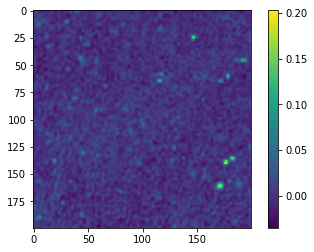

In [88]:
# For a dataset of 1000 images
from astropy.io import fits
import numpy as np
# Write your mean_fits function here:
def mean_fits(filenames):
   total = 0 
   n=len(filenames)
   start = time.perf_counter()

   if n>0:
      hdulist = fits.open(filenames[0])
      data = hdulist[0].data  
      hdulist.close()
      
      for i in range(1,n):
        hdulist = fits.open(filenames[i])
        data+= hdulist[0].data
        hdulist.close()
      
      total = time.perf_counter() - start 
      print('Time taken : {:.6f}s'.format(total))
        
      mean = data / n
      return mean
    
# Driver function
    
if __name__ == '__main__':
  
  # Test your function with examples from the question
  
  data = mean_fits(['Pulsarfits1000/{:0>4s}.fits'.format(str(k)) for k in range(1000)])
  print(data[100, 100])

  # You can also plot the result:
  import matplotlib.pyplot as plt
  plt.imshow(data.T, cmap=plt.cm.viridis)
  plt.colorbar()
  plt.show()

In [103]:
# # This problem is essentially a combination of the previous problem on FITS files and the binapprox problem. To solve it, we use the solution to the binapprox question and make it work on a list of 2D arrays instead of just a single list and we use the Astropy module to read in the FITS files.
# # Since we want to calculate the median across the stack of FITS files, we treat every array element individually. To start off, we use running_stats to calculate the mean and standard deviation across all the files - these are now arrays of shape (200, 200). The objects in which we stored the bin counts in the last problem we now implement as arrays too, where the bins array has one extra dimension, such that its shape becomes (200, 200, B), where B is the number of bins.
# # Then, to fill the bins array, we read in one FITS file at a time and loop through all array elements to check in which bin they belong.
# # Finally, we import the results from median_bins_FITS into the median_approx_FITS function and loop through the elements of the bin count arrays to calculate the median. Compare this solution in detail to the solution to the previous problem.

# ## HELPER FUNCTION (helper.py)

# import numpy as np
# from astropy.io import fits
# import time


# def running_stats(filenames):
#   '''Calculates the running mean and stdev for a list of FITS files using Welford's method.'''
#   n = 0
#   for filename in filenames:
#     hdulist = fits.open(filename)
#     data = hdulist[0].data
#     if n == 0:
#       mean = np.zeros_like(data)
#       s = np.zeros_like(data)

#     n += 1
#     delta = data - mean
#     mean += delta/n
#     s += delta*(data - mean)
#     hdulist.close()

#   s /= n - 1
#   np.sqrt(s, s)

#   if n < 2:
#     return mean, None
#   else:
#     return mean, s



# # Main Function and driver Fucntion Over here

# def median_bins_fits(filenames, B):
  
#   # Calculate the mean and standard dev
#   mean, std = running_stats(filenames)
    
#   dim = mean.shape # Dimension of the FITS file arrays
    
#   # Initialise bins
#   left_bin = np.zeros(dim)
#   bins = np.zeros((dim[0], dim[1], B))
#   bin_width = 2 * std / B 
  

#   # Timer Start
#   start = time.perf_counter()

#   # Loop over all FITS files
#   for filename in filenames:
#       hdulist = fits.open(filename)
#       data = hdulist[0].data

#       # Loop over every point in the 2D array
#       for i in range(dim[0]):
#         for j in range(dim[1]):
#           value = data[i, j]
#           mean_pt = mean[i, j]
#           std_pt= std[i, j]

#           if value < mean_pt - std_pt:
#             left_bin[i, j] += 1
                
#           elif value >= mean_pt - std_pt and value < mean_pt + std_pt:
#             bin = int((value - (mean_pt - std_pt))/bin_width[i, j])
#             bins[i, j, bin] += 1
        
        
#   t = time.perf_counter() - start
  
  
#   return mean, std, left_bin, bins, t



# def median_approx_fits(filenames, B):
  
#   mean, std, left_bin, bins, timer = median_bins_fits(filenames, B)
    
#   dim = mean.shape # Dimension of the FITS file arrays
  
#   start = time.perf_counter()  
 
#   # Position of the middle element over all files
#   N = len(filenames)
#   mid = (N + 1)/2
	
    
#   bin_width = 2*std / B
#   # Calculate the approximated median for each array element
#   median = np.zeros(dim)   
#   for i in range(dim[0]):
#     for j in range(dim[1]):    
#       count = left_bin[i, j]
#       for b, bincount in enumerate(bins[i, j]):
#         count += bincount
#         if count >= mid:
#           # Stop when the cumulative count exceeds the midpoint
#           break
#       median[i, j] = mean[i, j] - std[i, j] + bin_width[i, j]*(b + 0.5)
 

#   #Final timer
#   ti = time.perf_counter() - start
#   timer += ti
  
#   print('{:.6f}s'.format(timer))
    
#   return median
    


# # You can use this to test your function.
# # Any code inside this `if` statement will be ignored by the automarker.
# if __name__ == '__main__':
  
#   # Run your function with examples from the question.
#   #   mean, std, left_bin, bins, time = median_bins_fits(['Pulsarfitsrandom_position9587/{:0>4s}.fits'.format(str(i)) for i in range(7330)], 5)
#   #   median = median_approx_fits(['Pulsarfitsrandom_position9587/{:0>4s}.fits'.format(str(k)) for k in range(9587)], 1365)
  
    
#   # print (median)
    
#   import matplotlib.pyplot as plt
#   plt.imshow(median.T, cmap=plt.cm.viridis)
#   plt.colorbar()
#   plt.show()

In [ ]:
# Congratulations, you've finished this set of activities.
# If you've still got questions about any of the content, head to the forums to discuss with your fellow learners.

